<a href="https://colab.research.google.com/github/Melsonwang1/CVNL-assignment/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!cd /content/drive/My\ Drive/Colab\ Notebooks/
!ls
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks/')
from idlmam  import *

Mounted at /content/drive
drive  sample_data


/content/drive/My Drive/Colab Notebooks/idlmam.py:7: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
import unicodedata
import string
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim


In [3]:
pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_syste

In [5]:
from datasets import load_dataset

# Load the GoEmotions dataset
dataset = load_dataset("go_emotions")

# Check the dataset structure
print(dataset)
label_mapping = dataset["train"].features["labels"].feature.names
print(label_mapping)  # List of all emotion labels




README.md:   0%|          | 0.00/9.40k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/2.77M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/350k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/347k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/43410 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/5426 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/5427 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 43410
    })
    validation: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5426
    })
    test: Dataset({
        features: ['text', 'labels', 'id'],
        num_rows: 5427
    })
})
['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


In [6]:
save_path = "/content/drive/MyDrive/go_emotions"

# Save the dataset in JSON format
dataset.save_to_disk(save_path)

print(f"Dataset saved to {save_path}")

Saving the dataset (0/1 shards):   0%|          | 0/43410 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5426 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/5427 [00:00<?, ? examples/s]

Dataset saved to /content/drive/MyDrive/go_emotions


In [ ]:
#just in case the go_emotions doesn't work again

from datasets import load_from_disk

dataset = load_from_disk("/content/drive/MyDrive/go_emotions")
print(dataset)
label_mapping = dataset["train"].features["labels"].feature.names
print(label_mapping)  # List of all emotion labels

In [7]:
emotion_data = {}

all_letters = string.ascii_letters + " .,;'"
n_letters = len(all_letters)
alphabet = {}
for i in range(n_letters):
  alphabet[all_letters[i]] = i


def unicodeToAscii(s):
    # Turns a Unicode string into plain ASCII
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn' and c in all_letters
    )

for sample in dataset["train"]:
    text = sample["text"]  # The text sample
    labels = sample["labels"]  # The list of labels for this sample

    # Normalize the text using the unicodeToAscii function
    normalized_text = unicodeToAscii(text).lower()

    # Loop through all labels for this sample (in case there are multiple labels)
    for label in labels:
        emotion = label_mapping[label]  # Map label index to emotion name

        # Add to the emotion_data dictionary
        if emotion not in emotion_data:
            emotion_data[emotion] = []  # Initialize the list for this emotion
        emotion_data[emotion].append(normalized_text)

# Print out the emotion names and their respective text count
for emotion, texts in emotion_data.items():
    print(f"{emotion}: {len(texts)} samples")

neutral: 14219 samples
anger: 1567 samples
fear: 596 samples
annoyance: 2470 samples
surprise: 1060 samples
gratitude: 2662 samples
desire: 641 samples
optimism: 1581 samples
admiration: 4130 samples
confusion: 1368 samples
amusement: 2328 samples
approval: 2939 samples
caring: 1087 samples
embarrassment: 303 samples
realization: 1110 samples
disappointment: 1269 samples
grief: 77 samples
sadness: 1326 samples
curiosity: 2191 samples
joy: 1452 samples
love: 2086 samples
excitement: 853 samples
disapproval: 2022 samples
remorse: 545 samples
disgust: 793 samples
relief: 153 samples
pride: 111 samples
nervousness: 164 samples


In [8]:
class LanguageNameDataset(Dataset):

    def __init__(self, lang_name_dict, vocabulary):
      self.label_names = [x for x in lang_name_dict.keys()]
      self.data = []
      self.labels = []
      self.vocabulary = vocabulary
      for y, language in enumerate(self.label_names):
          for sample in lang_name_dict[language]:
              if len(sample) > 0:  # Filter out empty inputs
                  self.data.append(sample)
                  self.labels.append(y)

    def __len__(self):
        return len(self.data)

    def string2InputVec(self, input_string):
        """
        This method will convert any input string into a vector of long
        values, according to the vocabulary used by this object.
        input_string: the string to convert to a tensor
        """

        T = len(input_string) #How many characters long is the string?

        #Create a new tensor to store the result
        name_vec = torch.zeros((T), dtype=torch.long)
        #iterate through the string and place the appropriate values into the tensor
        for pos, character in enumerate(input_string):
            name_vec[pos] = self.vocabulary[character]

        return name_vec

    def __getitem__(self, idx):
        name = self.data[idx]
        label = self.labels[idx]

        #Convert the correct class label into a tensor for PyTorch
        label_vec = torch.tensor([label], dtype=torch.long)

        return self.string2InputVec(name), label


In [14]:
dataset = LanguageNameDataset(emotion_data, alphabet)

# Limit the dataset size to 20,000 samples
total_size = min(len(dataset), 20000)  # Use the smaller of the dataset size or 20,000

# Define proportions
train_ratio = 0.8  # 80% training
test_ratio = 0.2   # 20% testing

# Compute split sizes
train_size = int(train_ratio * total_size)
test_size = total_size - train_size

# Take a subset of the dataset if the dataset is larger than 20,000
subset_indices = torch.randperm(len(dataset))[:total_size]  # Randomly select 20,000 indices
subset_dataset = torch.utils.data.Subset(dataset, subset_indices)

# Randomly split the subset dataset
train_data, test_data = torch.utils.data.random_split(subset_dataset, [train_size, test_size])

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=1, shuffle=True)
test_loader = DataLoader(test_data, batch_size=1, shuffle=False)

In [19]:
import torch
import torch.nn as nn

def pad_and_pack(batch):
    #1, 2, & 3: organize the batch input lengths, inputs, and outputs as seperate lists
    input_tensors = []
    labels = []
    lengths = []
    for x, y in batch:
        input_tensors.append(x)
        labels.append(y)
        lengths.append(x.shape[0]) #Assume shape is (T, *)

    #4: create the padded version of the input
    x_padded = torch.nn.utils.rnn.pad_sequence(input_tensors, batch_first=False)
    #5: create the packed version from the padded & lengths
    x_packed = torch.nn.utils.rnn.pack_padded_sequence(x_padded, lengths, batch_first=False, enforce_sorted=False)
    #Convert the lengths into a tensor
    y_batched = torch.as_tensor(labels, dtype=torch.long)

    #6: return a tuple of the packed inputs and their labels
    return x_packed, y_batched


In [20]:
class EmbeddingPackable(nn.Module):
    """
    The embedding layer in PyTorch does not support Packed Sequence objects.
    This wrapper class will fix that. If a normal input comes in, it will
    use the regular Embedding layer. Otherwise, it will work on the packed
    sequence to return a new Packed sequence of the appropriate result.
    """
    def __init__(self, embd_layer):
        super(EmbeddingPackable, self).__init__()
        self.embd_layer = embd_layer

    def forward(self, input):
        if type(input) == torch.nn.utils.rnn.PackedSequence:
            # We need to unpack the input,
            sequences, lengths = torch.nn.utils.rnn.pad_packed_sequence(input.cpu(), batch_first=True)
            #Embed it
            sequences = self.embd_layer(sequences.to(input.data.device))
            #And pack it into a new sequence
            return torch.nn.utils.rnn.pack_padded_sequence(sequences, lengths.cpu(),
                                                           batch_first=True, enforce_sorted=False)
        else:#apply to normal data
            return self.embd_layer(input)


In [21]:
class LastTimeStep(nn.Module):
    """
    A class for extracting the hidden activations of the last time step following
    the output of a PyTorch RNN module.
    """
    def __init__(self, rnn_layers=1, bidirectional=False):
        super(LastTimeStep, self).__init__()
        self.rnn_layers = rnn_layers
        if bidirectional:
            self.num_driections = 2
        else:
            self.num_driections = 1

    def forward(self, input):
        #Result is either a tupe (out, h_t)
        #or a tuple (out, (h_t, c_t))
        rnn_output = input[0]
        last_step = input[1] #this will be h_t
        if(type(last_step) == tuple):#unless it's a tuple,
            last_step = last_step[0]#then h_t is the first item in the tuple

        batch_size = last_step.shape[1] #per docs, shape is: '(num_layers * num_directions, batch, hidden_size)'
        #reshaping so that everything is separate
        last_step = last_step.view(self.rnn_layers, self.num_driections, batch_size, -1)
        #We want the last layer's results
        last_step = last_step[self.rnn_layers-1]
        #Re order so batch comes first
        last_step = last_step.permute(1, 0, 2)

        #Finally, flatten the last two dimensions into one
        return last_step.reshape(batch_size, -1)


In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader

from tqdm.autonotebook import tqdm


import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd

import time


def visualize2DSoftmax(X, y, model):
    """Function to visualize the classification boundary of a learned model on a 2-D dataset

    Arguments:
    X -- a numpy array of shape (2, N), where N is the number of data points.
    y -- a numpy array of shape (N,), which contains values of either "0" or "1" for two different classes
    model -- a PyTorch Module object that represents a classifer to visualize. s
    """
    x_min = np.min(X[:,0])-0.5
    x_max = np.max(X[:,0])+0.5
    y_min = np.min(X[:,1])-0.5
    y_max = np.max(X[:,1])+0.5
    xv, yv = np.meshgrid(np.linspace(x_min, x_max, num=20), np.linspace(y_min, y_max, num=20), indexing='ij')
    xy_v = np.hstack((xv.reshape(-1,1), yv.reshape(-1,1)))
    with torch.no_grad():
        preds = model(torch.tensor(xy_v, dtype=torch.float32))
        preds = F.softmax(preds, dim=1).numpy()

    cs = plt.contourf(xv, yv, preds[:,0].reshape(20,20), levels=np.linspace(0,1,num=20), cmap=plt.cm.RdYlBu)
    sns.scatterplot(x=X[:,0], y=X[:,1], hue=y, style=y, ax=cs.ax)

def run_epoch(model, optimizer, data_loader, loss_func, device, results, score_funcs, prefix="", desc=None):
    """
    model -- the PyTorch model / "Module" to run for one epoch
    optimizer -- the object that will update the weights of the network
    data_loader -- DataLoader object that returns tuples of (input, label) pairs.
    loss_func -- the loss function that takes in two arguments, the model outputs and the labels, and returns a score
    device -- the compute lodation to perform training
    score_funcs -- a dictionary of scoring functions to use to evalue the performance of the model
    prefix -- a string to pre-fix to any scores placed into the _results_ dictionary.
    desc -- a description to use for the progress bar.
    """
    running_loss = []
    y_true = []
    y_pred = []
    start = time.time()
    for inputs, labels in tqdm(data_loader, desc=desc, leave=False):
        #Move the batch to the device we are using.
        inputs = moveTo(inputs, device)
        labels = moveTo(labels, device)

        y_hat = model(inputs) #this just computed f_Θ(x(i))
        # Compute loss.
        loss = loss_func(y_hat, labels)

        if model.training:
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        #Now we are just grabbing some information we would like to have
        running_loss.append(loss.item())

        if len(score_funcs) > 0 and isinstance(labels, torch.Tensor):
            #moving labels & predictions back to CPU for computing / storing predictions
            labels = labels.detach().cpu().numpy()
            y_hat = y_hat.detach().cpu().numpy()
            #add to predictions so far
            y_true.extend(labels.tolist())
            y_pred.extend(y_hat.tolist())
    #end training epoch
    end = time.time()

    y_pred = np.asarray(y_pred)
    if len(y_pred.shape) == 2 and y_pred.shape[1] > 1: #We have a classification problem, convert to labels
        y_pred = np.argmax(y_pred, axis=1)
    #Else, we assume we are working on a regression problem

    results[prefix + " loss"].append( np.mean(running_loss) )
    for name, score_func in score_funcs.items():
        try:
            results[prefix + " " + name].append( score_func(y_true, y_pred) )
        except:
            results[prefix + " " + name].append(float("NaN"))
    return end-start #time spent on epoch

def train_network(model, loss_func, train_loader, test_loader=None, score_funcs=None,
                         epochs=50, device="cpu", checkpoint_file=None, lr=0.001):
    """Train simple neural networks

    Keyword arguments:
    model -- the PyTorch model / "Module" to train
    loss_func -- the loss function that takes in batch in two arguments, the model outputs and the labels, and returns a score
    train_loader -- PyTorch DataLoader object that returns tuples of (input, label) pairs.
    test_loader -- Optional PyTorch DataLoader to evaluate on after every epoch
    score_funcs -- A dictionary of scoring functions to use to evalue the performance of the model
    epochs -- the number of training epochs to perform
    device -- the compute lodation to perform training

    """
    to_track = ["epoch", "total time", "train loss"]
    if test_loader is not None:
        to_track.append("test loss")
    for eval_score in score_funcs:
        to_track.append("train " + eval_score )
        if test_loader is not None:
            to_track.append("test " + eval_score )

    total_train_time = 0 #How long have we spent in the training loop?
    results = {}
    #Initialize every item with an empty list
    for item in to_track:
        results[item] = []

    #SGD is Stochastic Gradient Decent.
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    #Place the model on the correct compute resource (CPU or GPU)
    model.to(device)
    for epoch in tqdm(range(epochs), desc="Epoch"):
        model = model.train()#Put our model in training mode

        total_train_time += run_epoch(model, optimizer, train_loader, loss_func, device, results, score_funcs, prefix="train", desc="Training")

        results["total time"].append( total_train_time )
        results["epoch"].append( epoch )

        if test_loader is not None:
            model = model.eval()
            with torch.no_grad():
                run_epoch(model, optimizer, test_loader, loss_func, device, results, score_funcs, prefix="test", desc="Testing")

    if checkpoint_file is not None:
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'results' : results
            }, checkpoint_file)

    return pd.DataFrame.from_dict(results)



In [23]:
with torch.no_grad():
    input_sequence = torch.tensor([0, 1, 1, 0, 2], dtype=torch.long)
    embd = nn.Embedding(3, 2)
    x_seq = embd(input_sequence)

    print(input_sequence.shape, x_seq.shape)
    print(x_seq)


torch.Size([5]) torch.Size([5, 2])
tensor([[ 0.6839, -1.8291],
        [-1.3422, -0.5818],
        [-1.3422, -0.5818],
        [ 0.6839, -1.8291],
        [-0.0257,  0.7180]])


In [24]:
D = 64
vocab_size = len(all_letters)
hidden_nodes = 256
classes = len(dataset.label_names)

first_rnn = nn.Sequential(
  nn.Embedding(vocab_size, D), #(B, T) -> (B, T, D)
  nn.RNN(D, hidden_nodes, batch_first=True), #(B, T, D) -> ( (B,T,D) , (S, B, D)  )
  #the tanh activation is built into the RNN object, so we don't need to do it here
  LastTimeStep(), #We need to take the RNN output and reduce it to one item, (B, D)
  nn.Linear(hidden_nodes, classes), #(B, D) -> (B, classes)
)


In [26]:
from torch.utils.data import DataLoader

dataset = LanguageNameDataset(emotion_data, alphabet)
classes = len(dataset.label_names)
device = 'cpu'
loss_func = nn.CrossEntropyLoss()
from sklearn.metrics import accuracy_score



B = 30
train_loader = DataLoader(train_data, batch_size=B, shuffle=True, \
                          collate_fn=pad_and_pack)
test_loader = DataLoader(test_data, batch_size=B, shuffle=False, \
                         collate_fn=pad_and_pack)

rnn_packed = nn.Sequential(
  EmbeddingPackable(nn.Embedding(vocab_size, D)), #(B, T) -> (B, T, D)
  nn.RNN(D, hidden_nodes, batch_first=True), #(B, T, D) -> ( (B,T,D) , (S, B, D)  )
  LastTimeStep(), #We need to take the RNN output and reduce it to one item, (B, D)
  nn.Linear(hidden_nodes, classes), #(B, D) -> (B, classes)
)

rnn_packed.to(device)





Sequential(
  (0): EmbeddingPackable(
    (embd_layer): Embedding(57, 64)
  )
  (1): RNN(64, 256, batch_first=True)
  (2): LastTimeStep()
  (3): Linear(in_features=256, out_features=28, bias=True)
)

In [ ]:
rnn_3layer = nn.Sequential(
  EmbeddingPackable(nn.Embedding(vocab_size, D)), #(B, T) -> (B, T, D)
  nn.RNN(D, hidden_nodes, num_layers=3, batch_first=True), #(B, T, D) -> ( (B,T,D) , (S, B, D)  )
  LastTimeStep(rnn_layers=3), #We need to take the RNN output and reduce it to one item, (B, D)
  nn.Linear(hidden_nodes, classes), #(B, D) -> (B, classes)
)

optimizer = optim.Adam(rnn_3layer.parameters(), lr=0.001)  # Lower lr for stability
rnn_3layer.to(device)

rnn_3layer_results = train_network(
    rnn_3layer,
    loss_func,
    train_loader,
    test_loader=test_loader,
    score_funcs={'Accuracy': accuracy_score},
    device=device,
    epochs=10,
)



Epoch:   0%|          | 0/10 [00:00<?, ?it/s]

Training:   0%|          | 0/534 [00:00<?, ?it/s]

Testing:   0%|          | 0/134 [00:00<?, ?it/s]

Training:   0%|          | 0/534 [00:00<?, ?it/s]

Testing:   0%|          | 0/134 [00:00<?, ?it/s]

Training:   0%|          | 0/534 [00:00<?, ?it/s]

Testing:   0%|          | 0/134 [00:00<?, ?it/s]

Training:   0%|          | 0/534 [00:00<?, ?it/s]

Testing:   0%|          | 0/134 [00:00<?, ?it/s]

Training:   0%|          | 0/534 [00:00<?, ?it/s]

Testing:   0%|          | 0/134 [00:00<?, ?it/s]

Training:   0%|          | 0/534 [00:00<?, ?it/s]

Testing:   0%|          | 0/134 [00:00<?, ?it/s]

Training:   0%|          | 0/534 [00:00<?, ?it/s]

<Axes: xlabel='epoch', ylabel='test Accuracy'>

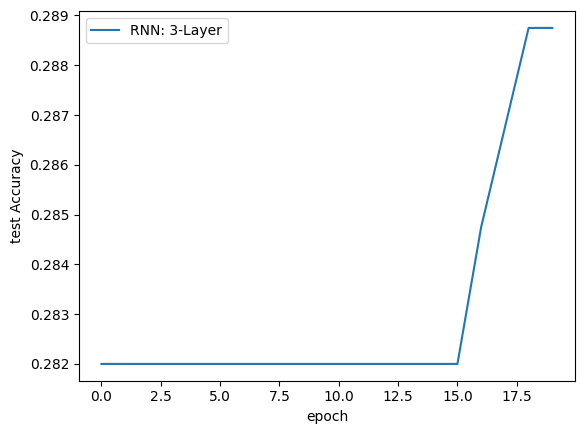

In [ ]:

sns.lineplot(x='epoch', y='test Accuracy', data=rnn_3layer_results,
label='RNN: 3-Layer')
